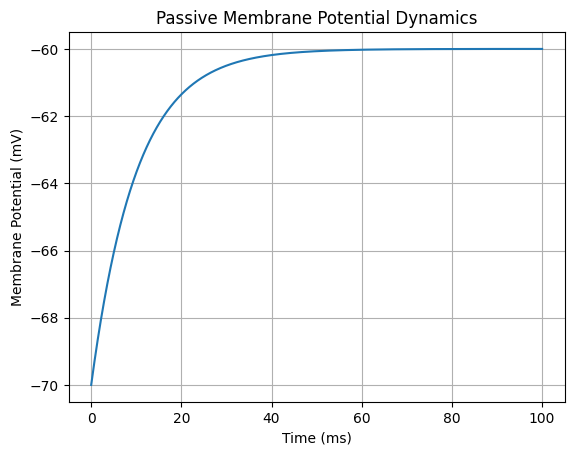

In [1]:
import matplotlib.pyplot as plt
import numpy as np

C = 1e-6  # Membrane capacitance (F)
gL = 1e-7  # Membrane conductance (S)
EL = -70e-3  # Reversal potential (V)
I = 1e-9  # Injected current (A)
dt = 1e-3  # Time step (s)
t_end = 100  # Simulation end time (s)

# Initialize variables
V = EL  # Initial membrane potential (V)
t = 0  # Initial time (s)

# Lists to store results
V_values = [V]
t_values = [t]

# Euler method
while t < t_end:
  dVdt = (gL * (EL - V) + I) / C
  V = V + dVdt * dt
  t = t + dt
  V_values.append(V)
  t_values.append(t)


# Plot the results
plt.plot(np.array(t_values), np.array(V_values) * 1000)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Passive Membrane Potential Dynamics')
plt.grid(True)
plt.show()


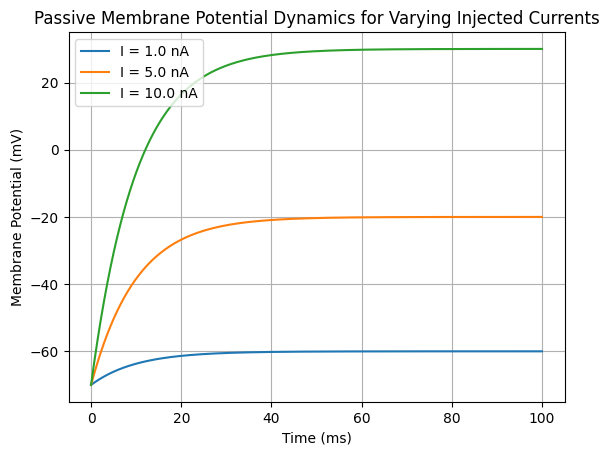

In [2]:
# prompt: Change the injected current and explain how the dynamics vary

import matplotlib.pyplot as plt
import numpy as np

# Constants
C = 1e-6  # Membrane capacitance (F)
gL = 1e-7  # Membrane conductance (S)
EL = -70e-3  # Reversal potential (V)
I_values = [1e-9, 5e-9, 10e-9] # Injected currents (A) - multiple values for comparison
dt = 1e-3  # Time step (s)
t_end = 100  # Simulation end time (s)


# Loop through different injected currents
for I in I_values:
    # Initialize variables
    V = EL  # Initial membrane potential (V)
    t = 0  # Initial time (s)

    # Lists to store results
    V_values = [V]
    t_values = [t]

    # Euler method
    while t < t_end:
        dVdt = (gL * (EL - V) + I) / C
        V = V + dVdt * dt
        t = t + dt
        V_values.append(V)
        t_values.append(t)

    # Plot the results for the current I
    plt.plot(np.array(t_values), np.array(V_values) * 1000, label=f'I = {I*1e9} nA')

# Add labels and title
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Passive Membrane Potential Dynamics for Varying Injected Currents')
plt.grid(True)
plt.legend() # Show the legend for different currents
plt.show()


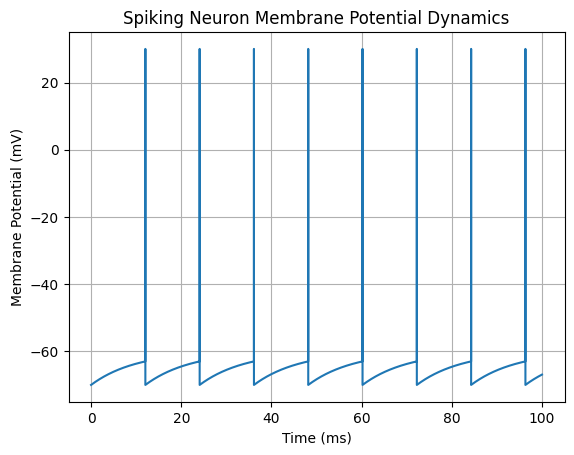

In [3]:
I = 1e-9  # Injected current (A)
Vth = -63e-3  # Threshold potential (V)
Vmax = 30e-3 # Maximum voltage during spike (V)
dt = 1e-3  # Time step (s)
t_end = 100  # Simulation end time (s)
EL = -70e-3
# Initialize variables
V = EL  # Initial membrane potential (V)
t = 0  # Initial time (s)


# Lists to store results
V0_values = [V]
t0_values = [t]

spike = 0
# Euler method
while t < t_end:

  if spike == 1:
    V = EL
    spike = 0
    t = t + dt
  else:
    dVdt = (gL * (EL - V) + I) / C
    V = V + dVdt * dt
    t = t + dt

    # Spiking mechanism
    if V >= Vth:
        V = Vmax #spike
        spike = 1


  V0_values.append(V)
  # Reset membrane potential
  t0_values.append(t)


# Plot the results
plt.plot(np.array(t0_values), np.array(V0_values) * 1000)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Spiking Neuron Membrane Potential Dynamics')
plt.grid(True)
plt.show()


1.5 bis


Neuron starts firing at approximately I = 0.80 nA


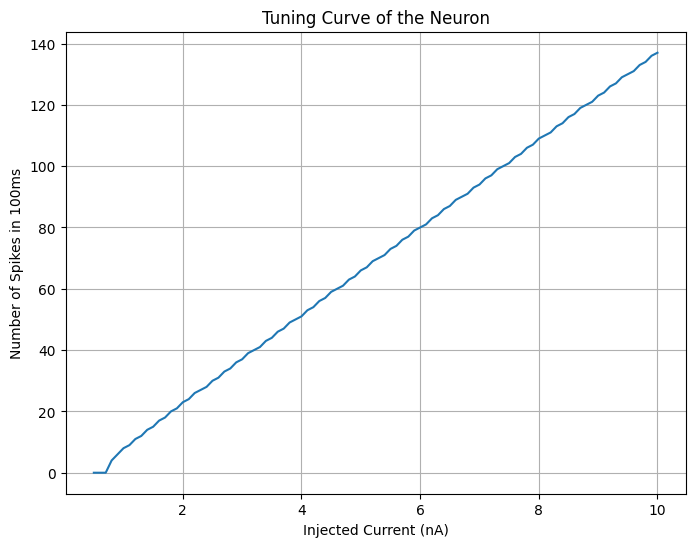

In [4]:
def simulate_neuron(I):
    # Initialize variables
    V = EL  # Initial membrane potential (V)
    t = 0  # Initial time (s)
    spike_count = 0

    # Lists to store results
    V_values = []
    t_values = []

    # Euler method
    while t < t_end:
        if V >= Vth:
            V = Vmax  # Spike
            spike_count += 1
            V = EL # Reset after spike
        else:
            dVdt = (gL * (EL - V) + I) / C
            V = V + dVdt * dt

        t = t + dt
        V_values.append(V)
        t_values.append(t)

    return spike_count, np.array(t_values), np.array(V_values)

# Tuning curve parameters
I_min = 0.5e-9  # Minimum injected current (A)
I_max = 10e-9  # Maximum injected current (A)
I_step = 0.1e-9 # Step size for injected current (A)


I_values = np.arange(I_min, I_max + I_step, I_step)
spike_counts = []

# Find the firing threshold
firing_threshold_found = False
for I in I_values:
    spike_count, t_values, V_values = simulate_neuron(I)
    spike_counts.append(spike_count)
    if spike_count > 0 and not firing_threshold_found:
        print(f"Neuron starts firing at approximately I = {I * 1e9:.2f} nA")
        firing_threshold_found = True

#Plot the tuning curve
plt.figure(figsize=(8, 6))
plt.plot(I_values * 1e9, spike_counts)
plt.xlabel("Injected Current (nA)")
plt.ylabel("Number of Spikes in 100ms")
plt.title("Tuning Curve of the Neuron")
plt.grid(True)
plt.show()


1.6

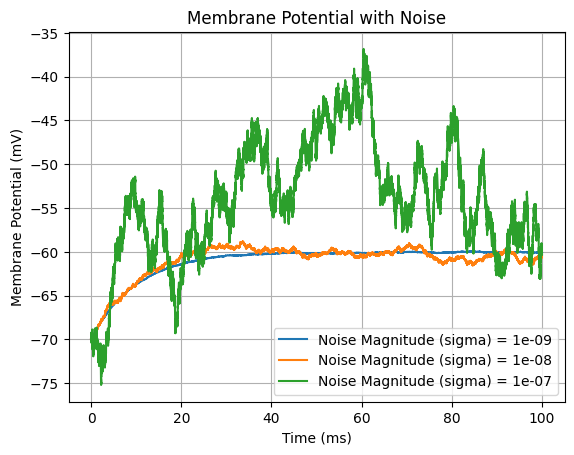

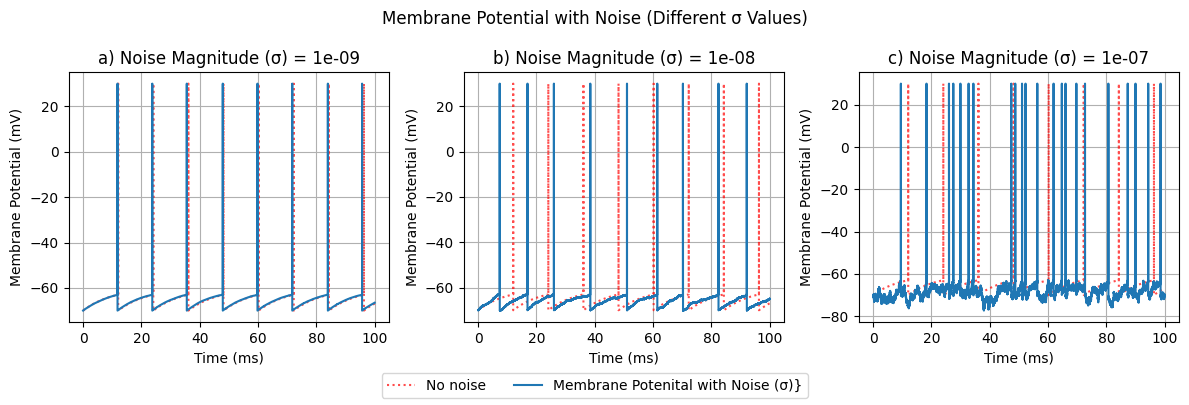

In [8]:
sigma_values = [1e-9, 1e-8, 1e-7] # Different noise magnitudes
I = 1e-9  # Injected current (A)
Vth = -63e-3  # Threshold potential (V)
Vmax = 30e-3 # Maximum voltage during spike (V)
dt = 1e-3  # Time step (s)
t_end = 100  # Simulation end time (s)
EL = -70e-3
# Initialize variables
V = EL  # Initial membrane potential (V)
t = 0  # Initial time (s)



for sigma in sigma_values:
    # Initialize variables
    V = EL  # Initial membrane potential (V)
    t = 0  # Initial time (s)
    V_values = [V]
    t_values = [t]

    # Euler method with noise
    while t < t_end:
        eta = np.random.normal(0, 1)  # Random variable from normal distribution
        dVdt = (gL * (EL - V) + I + sigma * eta) / C
        V = V + dVdt * dt + sigma * eta * np.sqrt(dt)
        t = t + dt
        V_values.append(V)
        t_values.append(t)

    # Plot the results for the current noise level
    plt.plot(np.array(t_values), np.array(V_values) * 1000, label=f'Noise Magnitude (sigma) = {sigma}')

# Add labels and title
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Membrane Potential with Noise')
plt.grid(True)
plt.legend() # Show the legend for different noise levels
plt.show()

# Initialize before sigma loop
V_values = []
t_values = []

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=True)  # Subplots in a row
fig.suptitle('Membrane Potential with Noise (Different σ Values)') # Overall title


for i,sigma in enumerate(sigma_values):
    t_end = 100  # Simulation end time (s)
    t = 0
    I = 1e-9  # Injected current (A)
    Vth = -63e-3  # Threshold potential (V)
    Vmax = 30e-3  # Maximum voltage during spike (V)
    dt = 1e-3  # Time step (s)
    EL = -70e-3

    V = EL # Reset V for each sigma
    V_values_each_sigma = [V] # Reset V_values_each_sigma for each sigma
    t_values_each_sigma = [t] # Reset t_values_each_sigma for each sigma

    spike = 0
    while t < t_end:

        if spike == 1:
            V = EL
            spike = 0
            t = t + dt
        else:
            eta = np.random.normal(0, 1)
            dVdt = (gL * (EL - V) + I + sigma * eta) / C
            V = V + dVdt * dt + sigma * eta * np.sqrt(dt)
            t = t + dt

            if V >= Vth:
                V = Vmax
                spike = 1

        V_values_each_sigma.append(V)
        t_values_each_sigma.append(t)


    axs[i].plot(np.array(t0_values), np.array(V0_values) * 1000, color ='red',linestyle ='dotted', alpha=0.7, label=f'No noise')
    axs[i].plot(np.array(t_values_each_sigma), np.array(V_values_each_sigma) * 1000, label='Membrane Potenital with Noise (σ)}')
    axs[i].set_ylabel('Membrane Potential (mV)') # Y-label for each subplot
    axs[i].grid(True)
    axs[i].set_title(chr(ord('a') + i) + ') Noise Magnitude (σ) = ' + str(sigma) )
    #axs[i].legend()   # Remove individual subplot legends
    axs[i].set_xlabel('Time (ms)') # X-label for the entire figure
# Add legend below the figure
handles, labels = axs[0].get_legend_handles_labels() # Get handles and labels from one subplot
fig.legend(handles, labels, loc='lower center', ncol=2) # Place legend below figure


plt.tight_layout() # Adjust spacing
plt.subplots_adjust(bottom=0.2) # Add space at the bottom for the legend

plt.show()


1.7

ValueError: x and y must have same first dimension, but have shapes (100038,) and (100039,)

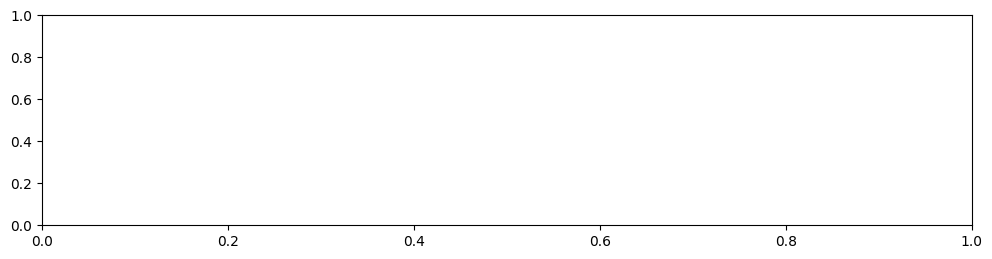

In [6]:
t = 0
I = np.zeros((100039))
time=np.linspace(0,1000,100038)
# Example time-varying input: sinusoidal current
I[int(0.2/dt):int(0.8/dt)] = 0.8e-9  #constant
I[int(10/dt):int(20/dt)] = 5e-9 #pulse
I[int(25/dt):int(45/dt)] = np.exp(-0.01*time[int(0/dt):int(20/dt)])*10e-9 #pulse
I[int(50/dt):int(90/dt)] = 3e-9 + 2e-9 * np.sin(2*np.pi*100*time[int(50/dt):int(90/dt)]) #sinusoidal
I[int(95/dt):int(100/dt)] = 8e-9  #constant
#Low level noise
sigma = 100e-12

# Lists to store results
V_values = [V]
t_values = [t]

V = 0

spike = 0
counter=0
# Euler method
while t < t_end:

  if spike == 1:
    V = EL
    spike = 0
  else:
    dVdt = (gL * (EL - V) + I[counter] +  sigma * eta) / C
    V = V + dVdt * dt + sigma * eta * np.sqrt(dt)
    t = t + dt

    # Spiking mechanism
    if V >= Vth:
        V = Vmax #spike
        spike = 1


  V_values.append(V)
  # Reset membrane potential
  t_values.append(t)
  counter+=1


t = np.array(t_values)
V_values = np.array(V_values)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, I * 1e9)
plt.xlabel('Time (s)')
plt.ylabel('Current (nA)')
plt.title('Time-Varying Input Current')

plt.subplot(2, 1, 2)
plt.plot(t, np.array(V_values) * 1000)
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Membrane Potential with Time-Varying Input')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
C = 1.0  # μF/cm²
g_L = 0.3  # mS/cm²
g_K = 36.0  # mS/cm²
g_Na = 120.0  # mS/cm²
E_L = -54.4  # mV
E_K = -77.0  # mV
E_Na = 50.0  # mV

# Function of alpha and beta rates for gating variables
def alpha_n(V):
    return 0.01 * (V + 55) / (1 - np.exp(-0.1 * (V + 55)))

def beta_n(V):
    return 0.125 * np.exp(-0.0125 * (V + 65))

def alpha_m(V):
    return 0.1 * (V + 40) / (1 - np.exp(-0.1 * (V + 40)))

def beta_m(V):
    return 4 * np.exp(-0.0556 * (V + 65))

def alpha_h(V):
    return 0.07 * np.exp(-0.05 * (V + 65))

def beta_h(V):
    return 1 / (1 + np.exp(-0.1 * (V + 35)))

# Hodgkin-Huxley model differential equations
def hodgkin_huxley_model(y, t, I):
    """
    Implements the Hodgkin-Huxley model differential equations.

    Parameters:
    y : array of state variables [V, h, m, n]
        V - membrane potential (mV)
        h - inactivation variable for Na+ channels
        m - activation variable for Na+ channels
        n - activation variable for K+ channels
    t : time (ms)
    I : injected current (μA/cm²)

    Returns:
    dydt : derivatives of state variables
    """
    V, h, m, n = y

    # Channel currents
    I_Na = g_Na * m**3 * h * (V - E_Na)  # Na+ current
    I_K = g_K * n**4 * (V - E_K)         # K+ current
    I_L = g_L * (V - E_L)                # Leak current

    # Differential equations
    dVdt = (I - I_Na - I_K - I_L) / C
    dhdt = alpha_h(V) * (1 - h) - beta_h(V) * h
    dmdt = alpha_m(V) * (1 - m) - beta_m(V) * m
    dndt = alpha_n(V) * (1 - n) - beta_n(V) * n

    return [dVdt, dhdt, dmdt, dndt]

# Time parameters
t_max = 50  # ms
dt = 0.01    # ms
t = np.arange(0, t_max, dt)

# Initial conditions [V, h, m, n]
y0 = [-65, 0.6, 0.05, 0.3]  # Typical resting values

# Function to simulate the model with a given current
def simulate_hh(I_value, t_max=50, dt=0.01):
    t = np.arange(0, t_max, dt)
    y = odeint(hodgkin_huxley_model, y0, t, args=(I_value,))
    return t, y

# Question 2.1: Simulate the Hodgkin-Huxley model
def plot_hh_dynamics(I_value=10.0):
    """Plot the dynamics of V, h, m, and n on the same plot."""
    t, y = simulate_hh(I_value, t_max=50)

    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Plot membrane potential on left y-axis
    ax1.plot(t, y[:, 0], 'b-', linewidth=2, label='V (mV)')
    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Membrane Potential (mV)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Create a second y-axis for gating variables
    ax2 = ax1.twinx()
    ax2.plot(t, y[:, 1], 'r-', label='h (Na+ inactivation)')
    ax2.plot(t, y[:, 2], 'g-', label='m (Na+ activation)')
    ax2.plot(t, y[:, 3], 'k-', label='n (K+ activation)')
    ax2.set_ylabel('Gating Variables', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Add legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    plt.title(f'Hodgkin-Huxley Model Dynamics (I = {I_value} μA/cm²)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Question 2.2: Vary the injected current
def find_repetitive_firing_threshold():
    """
    Increase the injected current from 0 to 10 μA/cm² and find the threshold
    for repetitive firing and the lowest firing rate.
    """
    currents = np.linspace(0, 10, 21)  # From 0 to 10 μA/cm² in 0.5 steps
    spikes_per_current = []
    t_max_long = 200  # Longer simulation to observe multiple spikes

    plt.figure(figsize=(15, 10))

    threshold_found = False
    threshold_value = None
    lowest_firing_rate = None

    for I in currents:
        t, y = simulate_hh(I, t_max=t_max_long)
        V = y[:, 0]

        # Count spikes (when voltage crosses 0 mV from below)
        spike_times = []
        for i in range(1, len(V)):
            if V[i-1] < 0 and V[i] >= 0:
                spike_times.append(t[i])

        num_spikes = len(spike_times)
        spikes_per_current.append(num_spikes)

        # If we have multiple spikes, calculate the firing rate
        if num_spikes > 1:
            # Calculate interspike intervals
            intervals = np.diff(spike_times)
            avg_interval = np.mean(intervals)
            firing_rate = 1000 / avg_interval  # Convert to Hz (spikes per second)

            # If this is the first time we've seen repetitive firing, record the threshold
            if not threshold_found:
                threshold_found = True
                threshold_value = I
                lowest_firing_rate = firing_rate
            elif firing_rate < lowest_firing_rate:
                lowest_firing_rate = firing_rate

        # Plot every few currents to avoid overcrowding
        if I % 2 == 0 or I == threshold_value:
            plt.plot(t, V, label=f'I = {I:.1f} μA/cm²')

    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential (mV)')
    plt.title('Action Potentials at Different Input Currents')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot number of spikes vs. input current
    plt.figure(figsize=(10, 6))
    plt.plot(currents, spikes_per_current, 'o-', linewidth=2)
    plt.xlabel('Input Current (μA/cm²)')
    plt.ylabel('Number of Spikes')
    plt.title('Number of Spikes vs. Input Current (200 ms simulation)')
    plt.grid(True)
    plt.axvline(x=threshold_value, color='r', linestyle='--',
                label=f'Repetitive Firing Threshold ≈ {threshold_value:.2f} μA/cm²')
    plt.legend()
    plt.show()

    print(f"The neuron starts to spike repetitively at I ≈ {threshold_value:.2f} μA/cm²")
    print(f"The lowest firing rate at repetitive firing is ≈ {lowest_firing_rate:.2f} Hz")

    return threshold_value, lowest_firing_rate

# Run the simulations to answer both questions
if __name__ == "__main__":
    print("Question 2.1: Simulating the Hodgkin-Huxley model dynamics")
    plot_hh_dynamics(I_value=10.0)

    print("\nQuestion 2.2: Finding the threshold for repetitive firing")
    threshold, lowest_rate = find_repetitive_firing_threshold()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Membrane capacitance (µF/cm^2)
Cm  = 1.0

# Maximum conductances (mS/cm^2)
gNa = 120.0
gK  = 36.0
gL  = 0.3

# Reversal potentials (mV)
ENa = 50.0
EK  = -77.0
EL  = -54.4

# Define alpha and beta functions for n, m, h

def alpha_n(V):
    # 0.01*(V+55) / (1 - exp(-(V+55)/10))
    return 0.01 * (V + 55.0) / (1.0 - np.exp(-(V + 55.0)/10.0))

def beta_n(V):
    # 0.125*exp(-(V+65)/80)
    return 0.125 * np.exp(-(V + 65.0)/80.0)

def alpha_m(V):
    # 0.1*(V+40) / (1 - exp(-(V+40)/10))
    return 0.1 * (V + 40.0) / (1.0 - np.exp(-(V + 40.0)/10.0))

def beta_m(V):
    # 4.0*exp(-(V+65)/18)
    return 4.0 * np.exp(-(V + 65.0)/18.0)

def alpha_h(V):
    # 0.07*exp(-(V+65)/20)
    return 0.07 * np.exp(-(V + 65.0)/20.0)

def beta_h(V):
    # 1.0 / (1 + exp(-(V+35)/10))
    return 1.0 / (1.0 + np.exp(-(V + 35.0)/10.0))

def hodgkin_huxley_euler(I_inj=0.0, T=50.0, dt=0.01):


    num_steps = int(np.round(T/dt))
    t = np.linspace(0, T, num_steps)

    # Initialize state variables
    V = np.zeros(num_steps)
    n = np.zeros(num_steps)
    m = np.zeros(num_steps)
    h = np.zeros(num_steps)

    # Typical resting initial conditions for HH
    V[0] = -65.0
    n[0] = 0.317
    m[0] = 0.05
    h[0] = 0.6

    # Euler integration
    for i in range(num_steps - 1):
        # Calculate alpha/beta at current step
        a_n = alpha_n(V[i])
        b_n = beta_n(V[i])
        a_m = alpha_m(V[i])
        b_m = beta_m(V[i])
        a_h = alpha_h(V[i])
        b_h = beta_h(V[i])

        # Gating variable updates
        dn = a_n*(1.0 - n[i]) - b_n*n[i]
        dm = a_m*(1.0 - m[i]) - b_m*m[i]
        dh = a_h*(1.0 - h[i]) - b_h*h[i]

        n[i+1] = n[i] + dt * dn
        m[i+1] = m[i] + dt * dm
        h[i+1] = h[i] + dt * dh

        # Currents
        I_Na = gNa * (m[i]**3) * h[i] * (V[i] - ENa)
        I_K  = gK  * (n[i]**4)         * (V[i] - EK)
        I_L  = gL  * (V[i] - EL)

        # Membrane voltage update
        dV = (I_inj - I_Na - I_K - I_L) / Cm
        V[i+1] = V[i] + dt * dV

    return t, V, n, m, h

# QUESTION 2.1: Simulate with I_inj = 10 and plot V, n, m, h vs. time

# --- 2.1: I_inj = 0 ---
T_sim = 50.0   # ms, for example
dt_sim = 0.01  # ms

t, V, n, m, h = hodgkin_huxley_euler(I_inj=10.0, T=T_sim, dt=dt_sim)

# Plot the results
plt.figure(figsize=(10,6))

# Membrane potential
plt.subplot(2,1,1)
plt.plot(t, V, label="V (mV)")
plt.title("HH model with I_inj = 10 µA/cm^2")
plt.ylabel("Membrane Voltage (mV)")
plt.legend()

# Gating variables
plt.subplot(2,1,2)
plt.plot(t, n, label="n")
plt.plot(t, m, label="m")
plt.plot(t, h, label="h")
plt.xlabel("Time (ms)")
plt.ylabel("Gating Value")
plt.legend()

plt.tight_layout()
plt.show()



    ############################################################################
   # QUESTION 2.2: Vary I_inj and find threshold + firing rate

    # We will sweep I_inj from 0.1 to 10.0
# detect spiking, and measure frequency if spiking.

I_values = np.arange(0.1, 10.1, 0.1)  # from 0.1 to 10.0 in steps of 0.1
T_sim = 200.0  # ms (longer to see repeated firing)
dt_sim = 0.01
spiking_threshold = None
firing_rates = []

for I_test in I_values:
    t, V, n, m, h = hodgkin_huxley_euler(I_inj=I_test, T=T_sim, dt=dt_sim)

    # Simple spike detection: count threshold crossings
    crossings = []
    for i in range(len(V)-1):
        if V[i] < 0 and V[i+1] >= 0:
            crossings.append(t[i])

    num_spikes = len(crossings)

    if num_spikes > 1:
        # Estimate firing rate from the last few spikes
        isi = np.diff(crossings)  # inter-spike intervals
        mean_isi = np.mean(isi)
        freq = 1000.0 / mean_isi  # Hz (since time is in ms)
    else:
        freq = 0.0

    firing_rates.append(freq)

    if spiking_threshold is None and freq > 0:
        spiking_threshold = I_test

# Report threshold current and minimal firing rate
if spiking_threshold is not None:
    # The first nonzero firing rate in our loop
    idx_thr = I_values.tolist().index(spiking_threshold)
    min_rate = firing_rates[idx_thr]
    print(f"Neuron begins to fire repetitively at I_inj = {spiking_threshold:.2f} µA/cm^2")
    print(f"Lowest firing rate at threshold is ~ {min_rate:.2f} Hz")
else:
    print("No repetitive firing detected in the given current range.")

# (Optional) Plot the firing rate vs. I_inj
plt.figure()
plt.plot(I_values, firing_rates, 'o-')
plt.xlabel("I_inj (µA/cm^2)")
plt.ylabel("Firing Rate (Hz)")
plt.title("Firing Rate vs. Injected Current")
plt.show()
